In [2]:
%%capture
!pip install pythtb --upgrade

In [3]:
# Cargar librería de pythtb
from pythtb import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from pylab import *

In [4]:
#Defino los vectores de red 
a   = 1
h   = 1.0
a_1 = [    1*a,              0,  0]
a_2 = [(1/2)*a,(np.sqrt(3)/2)*a, 0]
a_3 = [      0,               0, h]
lat = [a_1,a_2,a_3]


In [5]:
#Defino los orbitales (sitios) en terminos de a1 y a2 
orb = array( [[0,0,0],[0,1/2,0],[1/2,0,0]] )

In [6]:
Kagome = tb_model(3,3,lat,orb)

#Defino los parámetros 
t_a = -1.0
t_b = -2.4
t_z = -1

# 0 -> A
# 1 -> B
# 2 -> C
#Defino el valor de los hoppings en el plano xy
Kagome.set_hop(t_a,0,1,[0,0,0])
Kagome.set_hop(t_a,0,2,[0,0,0])
Kagome.set_hop(t_a,2,1,[0,0,0])
Kagome.set_hop(t_b,1,0,[0,1,0])
Kagome.set_hop(t_b,2,0,[1,0,0])
Kagome.set_hop(t_b,1,2,[-1,1,0])
#Defino el valor de los hopping en el eje z 
Kagome.set_hop(t_z,2,0,[1,0,-1])
Kagome.set_hop(t_z,2,0,[1,0,1])
Kagome.set_hop(t_z,1,0,[0,1,-1])
Kagome.set_hop(t_z,1,0,[0,1,1])
Kagome.set_hop(t_z,1,2,[-1,1,-1])
Kagome.set_hop(t_z,1,2,[-1,1,1])

In [7]:
# Lista de puntos que definen el path 
path  = [[1/3,2/3,-1/2],[1/3,2/3,1/2]]
k_vec, k_dist, k_node = Kagome.k_path(path,201,report=False)

# Obtengo los eigenvalores para cada punto (kx,ky,kz) de k_vec
evals = Kagome.solve_all(k_vec)

print(np.shape(evals))

(3, 201)


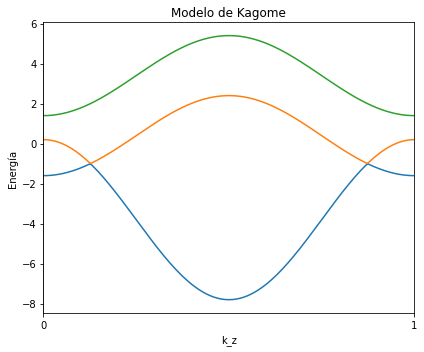

In [8]:
# Figura con la estructura de bandas

# Establecemos el nombre de la figura
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(6,5))

# Graficamos la banda 0
ax.plot(k_dist,evals[0])
# Graficamos la banda 1
ax.plot(k_dist,evals[1])
#Graficamos la banda 2 
ax.plot(k_dist,evals[2])
# Colocamos los xticks en los puntos del path
ax.set_xticks(k_node)

# Dibujamos líneas verticales en cada xtick
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], lw=0.5, color='k')

# Colocamos un título a la gráfica
ax.set_title("Modelo de Kagome")
# Colocamos una etiqueta al eje x
ax.set_xlabel("k_z")
# Colocamos una etiqueta al eje y
ax.set_ylabel("Energía")


# Especificamos los límites de graficación en el 
# eje de las abcisas
ax.set_xlim(0,1)

# Ajustamos los ejes y etiquetas antes de guardar la figura
fig.tight_layout()
# Guardamos la figura como un pdf
fig.savefig("BandasKagome.pdf")

In [9]:
# Lista de puntos que definen el path 
ky = 0
path  = [[0,ky,0],[1,ky,0]]
# Los puntos en el path corresponden a
# [ a,b,c ]
# a*b1+b*b2+c*kz

k_vec, k_dist, k_node = Kagome.k_path(path,201,report=False)

# Obtengo los eigenvalores para cada punto (kx,ky,kz) de k_vec
evals,eigvecs = Kagome.solve_all(k_vec,eig_vectors=True)

print(np.shape(evals))
print(np.shape(eigvecs))

(3, 201)
(3, 201, 3)


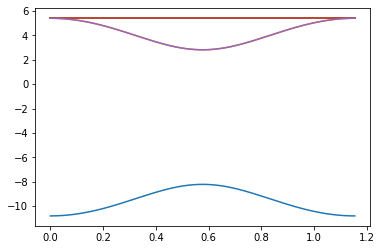

In [17]:
plot(k_dist,evals[0])
plot(k_dist,evals[1])
plot(k_dist,evals[2])
plot(k_dist,evals[-1])
plot(k_dist,evals[-2])